In [6]:
!pip install torchvision matplotlib numpy

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import EuroSAT
from torch.utils.data import DataLoader
from torch import nn, optim
from PIL import Image

In [8]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

dataset = EuroSAT(root='data', download=True, transform=transform)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

100%|██████████| 94.3M/94.3M [00:00<00:00, 289MB/s]


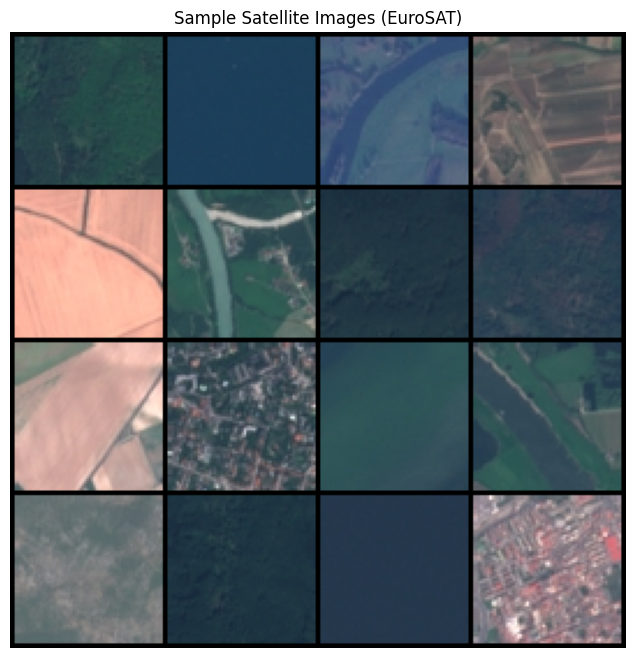

In [11]:
def show_batch(dl):
    imgs, labels = next(iter(dl))
    grid = torchvision.utils.make_grid(imgs[:16], nrow=4)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis("off")
    plt.title("Sample Satellite Images (EuroSAT)")
    plt.show()

show_batch(loader)

In [12]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*16*16, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.fc(self.conv(x))

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
for epoch in range(3):  # increase for better accuracy
    total_loss = 0
    for x, y in loader:
        optimizer.zero_grad()
        preds = model(x)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 959.3213
Epoch 2, Loss: 634.7870
Epoch 3, Loss: 526.4406


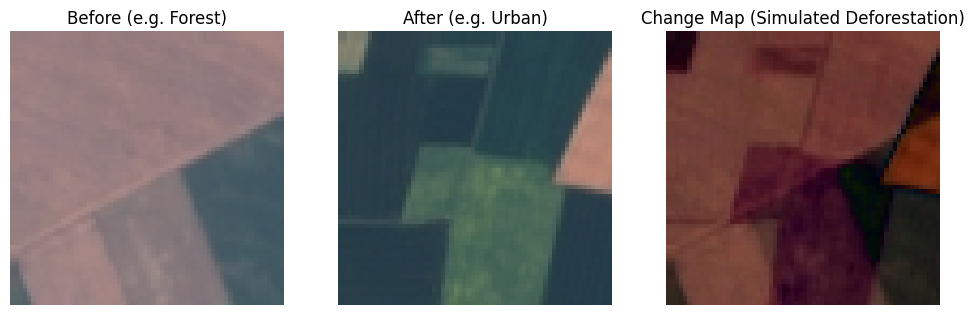

In [14]:
# Pick 2 different images from different classes and show difference

img1, _ = dataset[10]  # e.g. forest
img2, _ = dataset[1500]  # e.g. urban

diff = torch.abs(img1 - img2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img1.permute(1, 2, 0))
plt.title("Before (e.g. Forest)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2.permute(1, 2, 0))
plt.title("After (e.g. Urban)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(diff.permute(1, 2, 0))
plt.title("Change Map (Simulated Deforestation)")
plt.axis("off")
plt.show()